In [1]:
# Read data form data_labeled.csv

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data_labeled.csv")
print(df)

ax = plt.gca()
df.plot(kind='line', x='Date', y='Price',ax=ax)
plt.show()

plt.cla()
ax = plt.gca()
df.plot(kind='line', x='Date', y='Volume',ax=ax)
plt.show()

            Date    Price        Volume   Phase
0     2013-04-29   144.54  0.000000e+00    Rise
1     2013-04-30   139.00  0.000000e+00    Rise
2     2013-05-01   116.99  0.000000e+00    Rise
3     2013-05-02   105.21  0.000000e+00    Rise
4     2013-05-03    97.75  0.000000e+00    Rise
...          ...      ...           ...     ...
2510  2020-03-13  5563.71  7.415677e+10  Bottom
2511  2020-03-14  5200.37  3.615451e+10  Bottom
2512  2020-03-15  5392.31  3.399789e+10  Bottom
2513  2020-03-16  5014.48  4.536803e+10  Bottom
2514  2020-03-17  5225.63  3.862264e+10     NaN

[2515 rows x 4 columns]


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

            Date    Price        Volume   Phase  PriceLog
0     2013-04-29   144.54  0.000000e+00    Rise  2.159988
1     2013-04-30   139.00  0.000000e+00    Rise  2.143015
2     2013-05-01   116.99  0.000000e+00    Rise  2.068149
3     2013-05-02   105.21  0.000000e+00    Rise  2.022057
4     2013-05-03    97.75  0.000000e+00    Rise  1.990117
...          ...      ...           ...     ...       ...
2510  2020-03-13  5563.71  7.415677e+10  Bottom  3.745364
2511  2020-03-14  5200.37  3.615451e+10  Bottom  3.716034
2512  2020-03-15  5392.31  3.399789e+10  Bottom  3.731775
2513  2020-03-16  5014.48  4.536803e+10  Bottom  3.700226
2514  2020-03-17  5225.63  3.862264e+10     NaN  3.718139

[2515 rows x 5 columns]


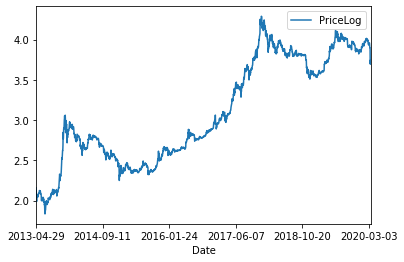

In [2]:
# Calcuate Log10 price

import matplotlib.pyplot as plt
import numpy as np

PriceLog = pd.Series(np.log10(df['Price']), name = 'PriceLog') 
df = df.join(PriceLog) 
print(df) 

ax = plt.gca()
df.plot(kind='line', x='Date', y='PriceLog',ax=ax)
plt.show()

            Date    Price        Volume   Phase  PriceLog     SMA100  \
0     2013-04-29   144.54  0.000000e+00    Rise  2.159988        NaN   
1     2013-04-30   139.00  0.000000e+00    Rise  2.143015        NaN   
2     2013-05-01   116.99  0.000000e+00    Rise  2.068149        NaN   
3     2013-05-02   105.21  0.000000e+00    Rise  2.022057        NaN   
4     2013-05-03    97.75  0.000000e+00    Rise  1.990117        NaN   
...          ...      ...           ...     ...       ...        ...   
2510  2020-03-13  5563.71  7.415677e+10  Bottom  3.745364  8403.1811   
2511  2020-03-14  5200.37  3.615451e+10  Bottom  3.716034  8380.7017   
2512  2020-03-15  5392.31  3.399789e+10  Bottom  3.731775  8359.1548   
2513  2020-03-16  5014.48  4.536803e+10  Bottom  3.700226  8333.7372   
2514  2020-03-17  5225.63  3.862264e+10     NaN  3.718139  8310.3500   

          SMA200      SMA500     SMA1000       EMA100  ...       EMA500  \
0            NaN         NaN         NaN          NaN  ...  

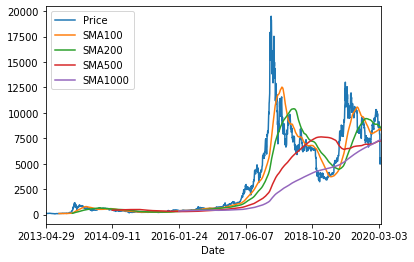

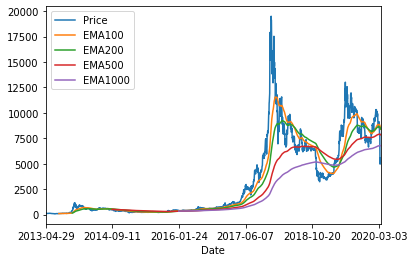

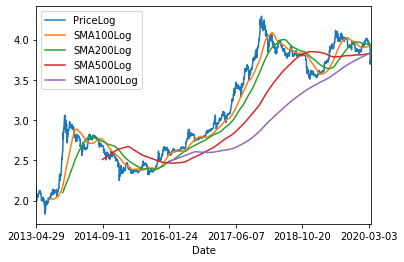

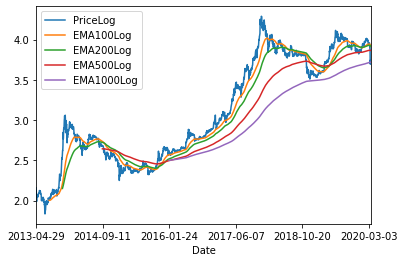

In [3]:
# Calculate SMA and EMA factor

import matplotlib.pyplot as plt

SMA100 = pd.Series(df['Price'].rolling(100).mean(), name = 'SMA100') 
df = df.join(SMA100)
SMA200 = pd.Series(df['Price'].rolling(200).mean(), name = 'SMA200') 
df = df.join(SMA200)
SMA500 = pd.Series(df['Price'].rolling(500).mean(), name = 'SMA500') 
df = df.join(SMA500)
SMA1000 = pd.Series(df['Price'].rolling(1000).mean(), name = 'SMA1000') 
df = df.join(SMA1000)

EMA100 = pd.Series(df['Price'].ewm(span = 100, min_periods = 100 - 1).mean(), name = 'EMA100')
df = df.join(EMA100)
EMA200 = pd.Series(df['Price'].ewm(span = 200, min_periods = 200 - 1).mean(), name = 'EMA200')
df = df.join(EMA200)
EMA500 = pd.Series(df['Price'].ewm(span = 500, min_periods = 500 - 1).mean(), name = 'EMA500')
df = df.join(EMA500)
EMA1000 = pd.Series(df['Price'].ewm(span = 1000, min_periods = 1000 - 1).mean(), name = 'EMA1000')
df = df.join(EMA1000)

SMA100 = pd.Series(df['PriceLog'].rolling(100).mean(), name = 'SMA100Log') 
df = df.join(SMA100)
SMA200 = pd.Series(df['PriceLog'].rolling(200).mean(), name = 'SMA200Log') 
df = df.join(SMA200)
SMA500 = pd.Series(df['PriceLog'].rolling(500).mean(), name = 'SMA500Log') 
df = df.join(SMA500)
SMA1000 = pd.Series(df['PriceLog'].rolling(1000).mean(), name = 'SMA1000Log') 
df = df.join(SMA1000)

EMA100 = pd.Series(df['PriceLog'].ewm(span = 100, min_periods = 100 - 1).mean(), name = 'EMA100Log')
df = df.join(EMA100)
EMA200 = pd.Series(df['PriceLog'].ewm(span = 200, min_periods = 200 - 1).mean(), name = 'EMA200Log')
df = df.join(EMA200)
EMA500 = pd.Series(df['PriceLog'].ewm(span = 500, min_periods = 500 - 1).mean(), name = 'EMA500Log')
df = df.join(EMA500)
EMA1000 = pd.Series(df['PriceLog'].ewm(span = 1000, min_periods = 1000 - 1).mean(), name = 'EMA1000Log')
df = df.join(EMA1000)

print(df)
    
ax = plt.gca()
df.plot(kind='line', x='Date', y='Price',ax=ax)
df.plot(kind='line', y='SMA100',ax=ax)
df.plot(kind='line', y='SMA200',ax=ax)
df.plot(kind='line', y='SMA500',ax=ax)
df.plot(kind='line', y='SMA1000',ax=ax)
plt.show()
                   
plt.cla()
ax = plt.gca()
df.plot(kind='line', x='Date', y='Price',ax=ax)
df.plot(kind='line', y='EMA100',ax=ax)
df.plot(kind='line', y='EMA200',ax=ax)
df.plot(kind='line', y='EMA500',ax=ax)
df.plot(kind='line', y='EMA1000',ax=ax)
plt.show()

plt.cla()
ax = plt.gca()
df.plot(kind='line', x='Date', y='PriceLog',ax=ax)
df.plot(kind='line', y='SMA100Log',ax=ax)
df.plot(kind='line', y='SMA200Log',ax=ax)
df.plot(kind='line', y='SMA500Log',ax=ax)
df.plot(kind='line', y='SMA1000Log',ax=ax)
plt.show()

plt.cla()
ax = plt.gca()
df.plot(kind='line', x='Date', y='PriceLog',ax=ax)
df.plot(kind='line', y='EMA100Log',ax=ax)
df.plot(kind='line', y='EMA200Log',ax=ax)
df.plot(kind='line', y='EMA500Log',ax=ax)
df.plot(kind='line', y='EMA1000Log',ax=ax)
plt.show()

            Date    Price        Volume   Phase  PriceLog     SMA100  \
0     2013-04-29   144.54  0.000000e+00    Rise  2.159988        NaN   
1     2013-04-30   139.00  0.000000e+00    Rise  2.143015        NaN   
2     2013-05-01   116.99  0.000000e+00    Rise  2.068149        NaN   
3     2013-05-02   105.21  0.000000e+00    Rise  2.022057        NaN   
4     2013-05-03    97.75  0.000000e+00    Rise  1.990117        NaN   
...          ...      ...           ...     ...       ...        ...   
2510  2020-03-13  5563.71  7.415677e+10  Bottom  3.745364  8403.1811   
2511  2020-03-14  5200.37  3.615451e+10  Bottom  3.716034  8380.7017   
2512  2020-03-15  5392.31  3.399789e+10  Bottom  3.731775  8359.1548   
2513  2020-03-16  5014.48  4.536803e+10  Bottom  3.700226  8333.7372   
2514  2020-03-17  5225.63  3.862264e+10     NaN  3.718139  8310.3500   

          SMA200      SMA500     SMA1000       EMA100  ...  SMA100Log  \
0            NaN         NaN         NaN          NaN  ...    

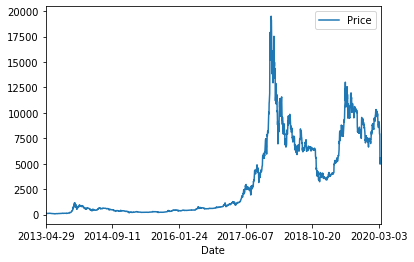

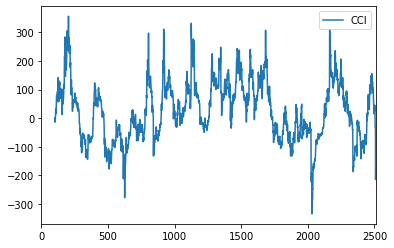

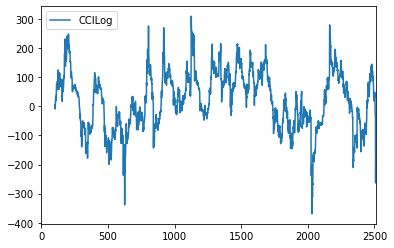

In [4]:
# Calculate CCI factor

CCI = pd.Series((df['Price'] - df['Price'].rolling(100).mean()) / (0.015 * df['Price'].rolling(100).std()), name = 'CCI')
df = df.join(CCI)

CCI = pd.Series((df['PriceLog'] - df['PriceLog'].rolling(100).mean()) / (0.015 * df['PriceLog'].rolling(100).std()), name = 'CCILog')
df = df.join(CCI)

print(df)

ax = plt.gca()
df.plot(kind='line', x='Date', y='Price',ax=ax)        
plt.show()

plt.cla()
ax = plt.gca()
df.plot(kind='line', y='CCI',ax=ax)
plt.show()

plt.cla()
ax = plt.gca()
df.plot(kind='line', y='CCILog',ax=ax)
plt.show()

            Date    Price        Volume   Phase  PriceLog     SMA100  \
0     2013-04-29   144.54  0.000000e+00    Rise  2.159988        NaN   
1     2013-04-30   139.00  0.000000e+00    Rise  2.143015        NaN   
2     2013-05-01   116.99  0.000000e+00    Rise  2.068149        NaN   
3     2013-05-02   105.21  0.000000e+00    Rise  2.022057        NaN   
4     2013-05-03    97.75  0.000000e+00    Rise  1.990117        NaN   
...          ...      ...           ...     ...       ...        ...   
2510  2020-03-13  5563.71  7.415677e+10  Bottom  3.745364  8403.1811   
2511  2020-03-14  5200.37  3.615451e+10  Bottom  3.716034  8380.7017   
2512  2020-03-15  5392.31  3.399789e+10  Bottom  3.731775  8359.1548   
2513  2020-03-16  5014.48  4.536803e+10  Bottom  3.700226  8333.7372   
2514  2020-03-17  5225.63  3.862264e+10     NaN  3.718139  8310.3500   

          SMA200      SMA500     SMA1000       EMA100  ...  SMA500Log  \
0            NaN         NaN         NaN          NaN  ...    

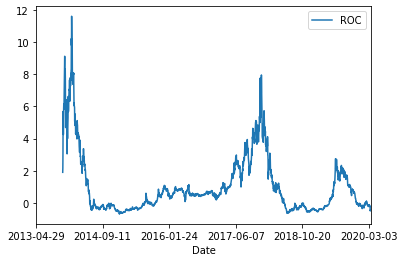

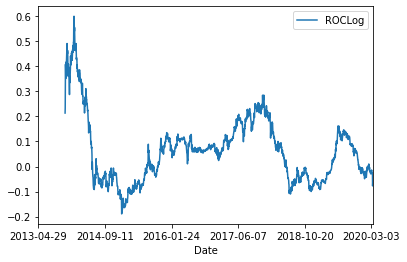

In [5]:
# Calculate ROC factor

N = df['Price'].diff(200)
D = df['Price'].shift(200)
ROC = pd.Series(N/D,name='ROC')
df = df.join(ROC)

N = df['PriceLog'].diff(200)
D = df['PriceLog'].shift(200)
ROC = pd.Series(N/D,name='ROCLog')
df = df.join(ROC)
print(df)

ax = plt.gca()
df.plot(kind='line', x='Date', y='ROC',ax=ax)        
plt.show()

plt.cla()
ax = plt.gca()
df.plot(kind='line',  x='Date', y='ROCLog',ax=ax)
plt.show()

            Date    Price        Volume   Phase  PriceLog     SMA100  \
0     2013-04-29   144.54  0.000000e+00    Rise  2.159988        NaN   
1     2013-04-30   139.00  0.000000e+00    Rise  2.143015        NaN   
2     2013-05-01   116.99  0.000000e+00    Rise  2.068149        NaN   
3     2013-05-02   105.21  0.000000e+00    Rise  2.022057        NaN   
4     2013-05-03    97.75  0.000000e+00    Rise  1.990117        NaN   
...          ...      ...           ...     ...       ...        ...   
2510  2020-03-13  5563.71  7.415677e+10  Bottom  3.745364  8403.1811   
2511  2020-03-14  5200.37  3.615451e+10  Bottom  3.716034  8380.7017   
2512  2020-03-15  5392.31  3.399789e+10  Bottom  3.731775  8359.1548   
2513  2020-03-16  5014.48  4.536803e+10  Bottom  3.700226  8333.7372   
2514  2020-03-17  5225.63  3.862264e+10     NaN  3.718139  8310.3500   

          SMA200      SMA500     SMA1000       EMA100  ...        BBU500  \
0            NaN         NaN         NaN          NaN  ... 

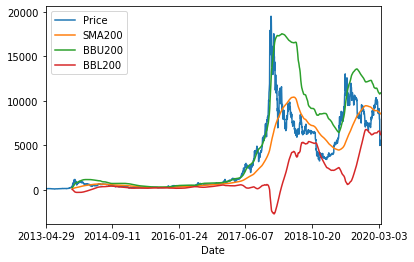

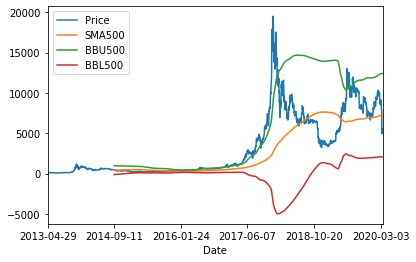

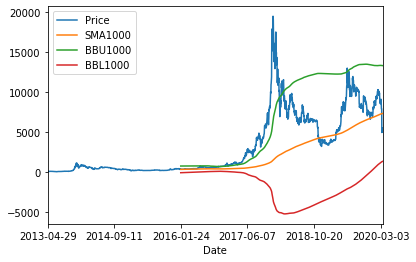

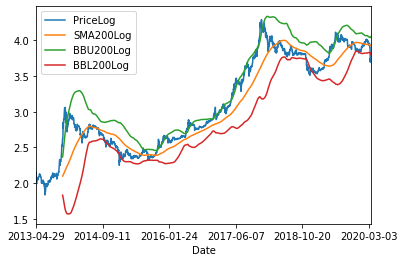

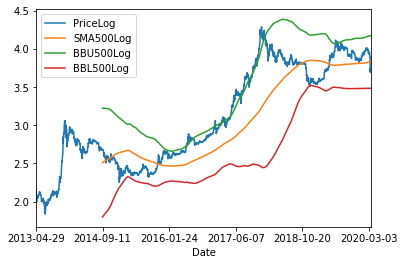

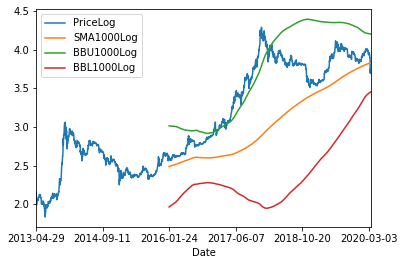

In [6]:
# Calculate Bollinger Bands factor

MA = pd.Series(df['Price'].rolling(200).mean())
SD = pd.Series(df['Price'].rolling(200).std())
b1 = MA + (2 * SD)
BB1 = pd.Series(b1, name = 'BBU200') 
df = df.join(BB1) 
b2 = MA - (2 * SD)
BB2 = pd.Series(b2, name = 'BBL200') 
df = df.join(BB2) 

MA = pd.Series(df['Price'].rolling(500).mean())
SD = pd.Series(df['Price'].rolling(500).std())
b1 = MA + (2 * SD)
BB1 = pd.Series(b1, name = 'BBU500') 
df = df.join(BB1) 
b2 = MA - (2 * SD)
BB2 = pd.Series(b2, name = 'BBL500') 
df = df.join(BB2) 

MA = pd.Series(df['Price'].rolling(1000).mean())
SD = pd.Series(df['Price'].rolling(1000).std())
b1 = MA + (2 * SD)
BB1 = pd.Series(b1, name = 'BBU1000') 
df = df.join(BB1) 
b2 = MA - (2 * SD)
BB2 = pd.Series(b2, name = 'BBL1000') 
df = df.join(BB2) 

############## log10 ################

MA = pd.Series(df['PriceLog'].rolling(200).mean())
SD = pd.Series(df['PriceLog'].rolling(200).std())
b1 = MA + (2 * SD)
BB1 = pd.Series(b1, name = 'BBU200Log') 
df = df.join(BB1) 
b2 = MA - (2 * SD)
BB2 = pd.Series(b2, name = 'BBL200Log') 
df = df.join(BB2) 

MA = pd.Series(df['PriceLog'].rolling(500).mean())
SD = pd.Series(df['PriceLog'].rolling(500).std())
b1 = MA + (2 * SD)
BB1 = pd.Series(b1, name = 'BBU500Log') 
df = df.join(BB1) 
b2 = MA - (2 * SD)
BB2 = pd.Series(b2, name = 'BBL500Log') 
df = df.join(BB2) 

MA = pd.Series(df['PriceLog'].rolling(1000).mean())
SD = pd.Series(df['PriceLog'].rolling(1000).std())
b1 = MA + (2 * SD)
BB1 = pd.Series(b1, name = 'BBU1000Log') 
df = df.join(BB1) 
b2 = MA - (2 * SD)
BB2 = pd.Series(b2, name = 'BBL1000Log') 
df = df.join(BB2) 

print(df)

ax = plt.gca()
df.plot(kind='line', x='Date', y='Price',ax=ax)    
df.plot(kind='line', y='SMA200',ax=ax)
df.plot(kind='line', y='BBU200',ax=ax)
df.plot(kind='line', y='BBL200',ax=ax)
plt.show()


plt.cla()
ax = plt.gca()
df.plot(kind='line', x='Date', y='Price',ax=ax)
df.plot(kind='line', y='SMA500',ax=ax)
df.plot(kind='line', y='BBU500',ax=ax)
df.plot(kind='line', y='BBL500',ax=ax)
plt.show()

plt.cla()
ax = plt.gca()
df.plot(kind='line', x='Date', y='Price',ax=ax)
df.plot(kind='line', y='SMA1000',ax=ax)
df.plot(kind='line', y='BBU1000',ax=ax)
df.plot(kind='line', y='BBL1000',ax=ax)
plt.show()

ax = plt.gca()
df.plot(kind='line', x='Date', y='PriceLog',ax=ax)    
df.plot(kind='line', y='SMA200Log',ax=ax)
df.plot(kind='line', y='BBU200Log',ax=ax)
df.plot(kind='line', y='BBL200Log',ax=ax)
plt.show()


plt.cla()
ax = plt.gca()
df.plot(kind='line', x='Date', y='PriceLog',ax=ax)
df.plot(kind='line', y='SMA500Log',ax=ax)
df.plot(kind='line', y='BBU500Log',ax=ax)
df.plot(kind='line', y='BBL500Log',ax=ax)
plt.show()

plt.cla()
ax = plt.gca()
df.plot(kind='line', x='Date', y='PriceLog',ax=ax)
df.plot(kind='line', y='SMA1000Log',ax=ax)
df.plot(kind='line', y='BBU1000Log',ax=ax)
df.plot(kind='line', y='BBL1000Log',ax=ax)
plt.show()

            Date    Price        Volume   Phase  PriceLog     SMA100  \
0     2013-04-29   144.54  0.000000e+00    Rise  2.159988        NaN   
1     2013-04-30   139.00  0.000000e+00    Rise  2.143015        NaN   
2     2013-05-01   116.99  0.000000e+00    Rise  2.068149        NaN   
3     2013-05-02   105.21  0.000000e+00    Rise  2.022057        NaN   
4     2013-05-03    97.75  0.000000e+00    Rise  1.990117        NaN   
...          ...      ...           ...     ...       ...        ...   
2510  2020-03-13  5563.71  7.415677e+10  Bottom  3.745364  8403.1811   
2511  2020-03-14  5200.37  3.615451e+10  Bottom  3.716034  8380.7017   
2512  2020-03-15  5392.31  3.399789e+10  Bottom  3.731775  8359.1548   
2513  2020-03-16  5014.48  4.536803e+10  Bottom  3.700226  8333.7372   
2514  2020-03-17  5225.63  3.862264e+10     NaN  3.718139  8310.3500   

          SMA200      SMA500     SMA1000       EMA100  ...       BBU1000  \
0            NaN         NaN         NaN          NaN  ... 

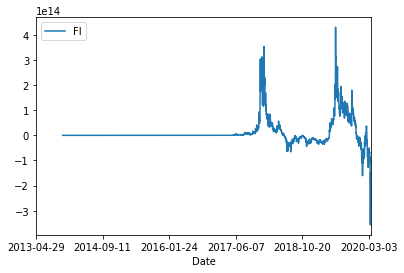

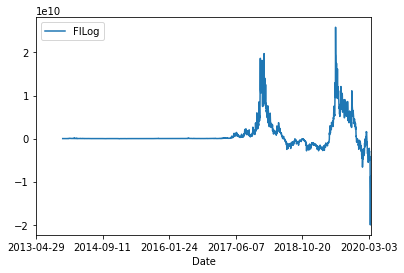

In [7]:
# Calculate Force Index factor

FI = pd.Series(df['Price'].diff(200) * df['Volume'], name = 'FI') 
df = df.join(FI) 

FI = pd.Series(df['PriceLog'].diff(200) * df['Volume'], name = 'FILog') 
df = df.join(FI) 

print(df)

ax = plt.gca()
df.plot(kind='line', x='Date', y='FI',ax=ax)    
plt.show()

ax = plt.gca()
df.plot(kind='line', x='Date', y='FILog',ax=ax)    
plt.show()

In [ ]:
# Prepare Data

df_data_for_predict = df.drop('Phase', axis=1)
df_data_for_predict = df_data_for_predict.drop('Date', axis=1)
df_data_for_predict = df_data_for_predict.drop('SMA1000', axis=1)
df_data_for_predict = df_data_for_predict.drop('EMA1000', axis=1)
df_data_for_predict = df_data_for_predict.drop('SMA1000Log', axis=1)
df_data_for_predict = df_data_for_predict.drop('EMA1000Log', axis=1)
df_data_for_predict = df_data_for_predict.drop('BBU1000', axis=1)
df_data_for_predict = df_data_for_predict.drop('BBL1000', axis=1)
df_data_for_predict = df_data_for_predict.drop('BBU1000Log', axis=1)
df_data_for_predict = df_data_for_predict.drop('BBL1000Log', axis=1)

In [12]:
# Load model.m and predict

from sklearn.ensemble import RandomForestClassifier
import joblib

clf = RandomForestClassifier()
clf = joblib.load("model.m")

print("Predict Data:")

for index, row in df.iterrows():
    if(pd.isna(row["Phase"])):     
        #print(row)
        #print(index)
        phase_predicted = clf.predict(df_data_for_predict.iloc[index,:].values.reshape(1,-1))
        print(df.loc[index,"Date"] + ": " + phase_predicted[0])

Predict Data:
2020-03-17: Bottom
